# Постановка задачи

### В таблице указаны супергерои и данные о них. 
Нужно узнать
1. Какой издатель имеет больше всего героев.
2. Кого в этой таблице больше, героев или злодеев?
3. Сколько различных рас есть в таблице.
Провести корелляцию путем преобразования из типа объекта в числовые данные. 

### Подключение библиотек

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plot

# Загрузка данных 

In [2]:
df = pd.read_excel("1_heroes_information.xlsx")

In [3]:
df.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


# Описание данных

### Признаки
- Unnamed: - индекс строки в данных
- name - имя героя
- Gender - пол героя
- Eye color - цвет глаз
- Race - раса
- Hair color - цвет волос
- Height - рост
- Publisher - владелец героя
- Skin color - цвет костюма
- Aligment - роль героя (герой или злодей)
- Weight - вес 

In [4]:
df.shape

(734, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  734 non-null    int64  
 1   name        734 non-null    object 
 2   Gender      734 non-null    object 
 3   Eye color   734 non-null    object 
 4   Race        734 non-null    object 
 5   Hair color  734 non-null    object 
 6   Height      734 non-null    float64
 7   Publisher   719 non-null    object 
 8   Skin color  734 non-null    object 
 9   Alignment   734 non-null    object 
 10  Weight      732 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 63.2+ KB


В таблице 11 столбцов. Тип данных - object, float64, int64.
Количество в столбцах различается. Значит есть пропущенные данные

In [6]:
df.describe()

,Unnamed: 0,Height,Weight
count,734.000000,734.000000,732.000000
mean,366.500000,102.254087,43.855191
std,212.031837,139.624543,130.823733
min,0.000000,-99.000000,-99.000000
25%,183.250000,-99.000000,-99.000000
50%,366.500000,175.000000,62.000000
75%,549.750000,185.000000,90.000000
max,733.000000,975.000000,900.000000


In [7]:
df.describe(include="O")

,name,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment
count,734,734,734,734,734,719,734,734
unique,715,3,23,62,30,24,17,4
top,Goliath,Male,blue,-,-,Marvel Comics,-,good
freq,3,505,225,304,172,388,662,496


In [8]:
#У нас есть столбец Unnamed: 0, переназовем его в IDHero.
df.rename(columns = {"Unnamed: 0": "IDHero"}, inplace = True)
df.head()

,IDHero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


В каждой строке таблицы - данные о герои какой-то мультивселенной. Можно утверждать, что данных достаточно для ответов на вопросы.
Но встречаются пропуски данных, также замены артефактов(например отрицательные данные в столбце роста).Возможны дубликаты.

# Разведочный анализ данных

### Проверка на пропущенные и дублирующиеся записи.

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.isna().sum()

IDHero         0
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [11]:
df_cleaned = df.dropna() #удаление пропущенных значений S
df_cleaned.isna().sum() 

IDHero        0
name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [12]:
#У нас в столбцах также есть аномальные значения в виде отрицательного роста и веса героя. Будем заменять их на ноль.
df["Height"] = df["Height"].replace(-99, 0)
df["Weight"] = df["Weight"].replace(-99, 0)
df.describe() #проверка

,IDHero,Height,Weight
count,734.000000,734.000000,732.00000
mean,366.500000,131.522480,75.90847
std,212.031837,98.701014,100.46474
min,0.000000,0.000000,0.00000
25%,183.250000,0.000000,0.00000
50%,366.500000,175.000000,62.00000
75%,549.750000,185.000000,90.00000
max,733.000000,975.000000,900.00000


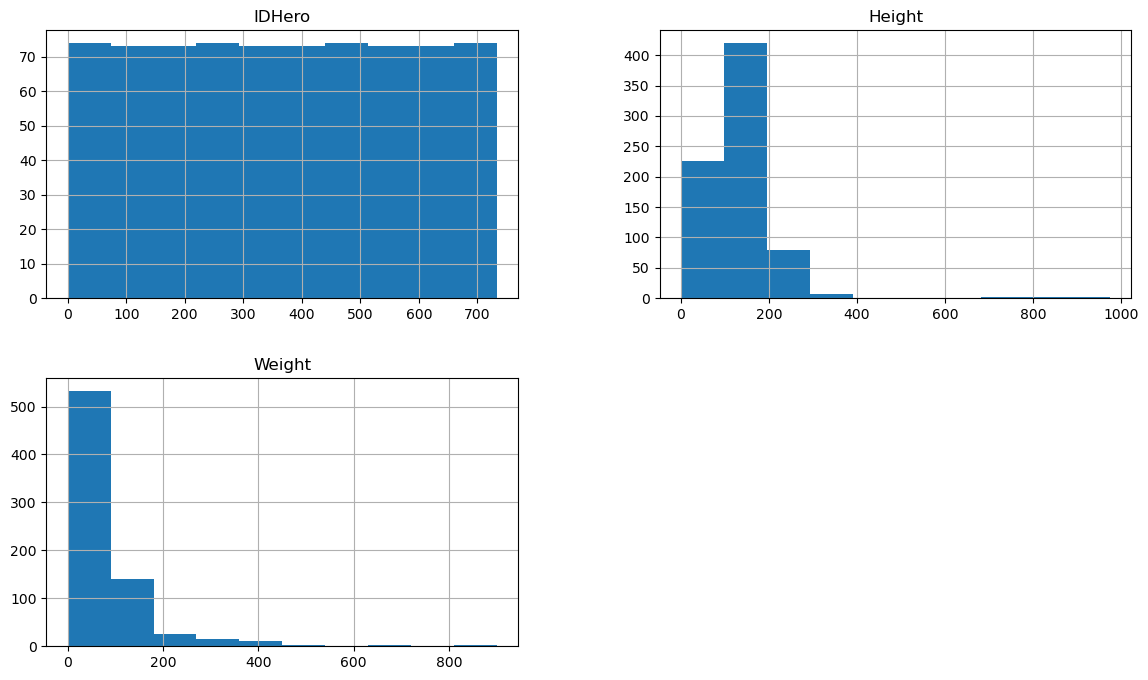

In [13]:
df.hist(figsize = (14,8));

In [14]:
df['Publisher'].value_counts()

Publisher
Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
George Lucas          14
HarperCollins          6
Star Trek              6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Icon Comics            4
Shueisha               4
IDW Publishing         4
Wildstorm              3
Sony Pictures          2
Universal Studios      1
South Park             1
Hanna-Barbera          1
J. K. Rowling          1
Titan Books            1
Rebellion              1
Microsoft              1
J. R. R. Tolkien       1
Name: count, dtype: int64

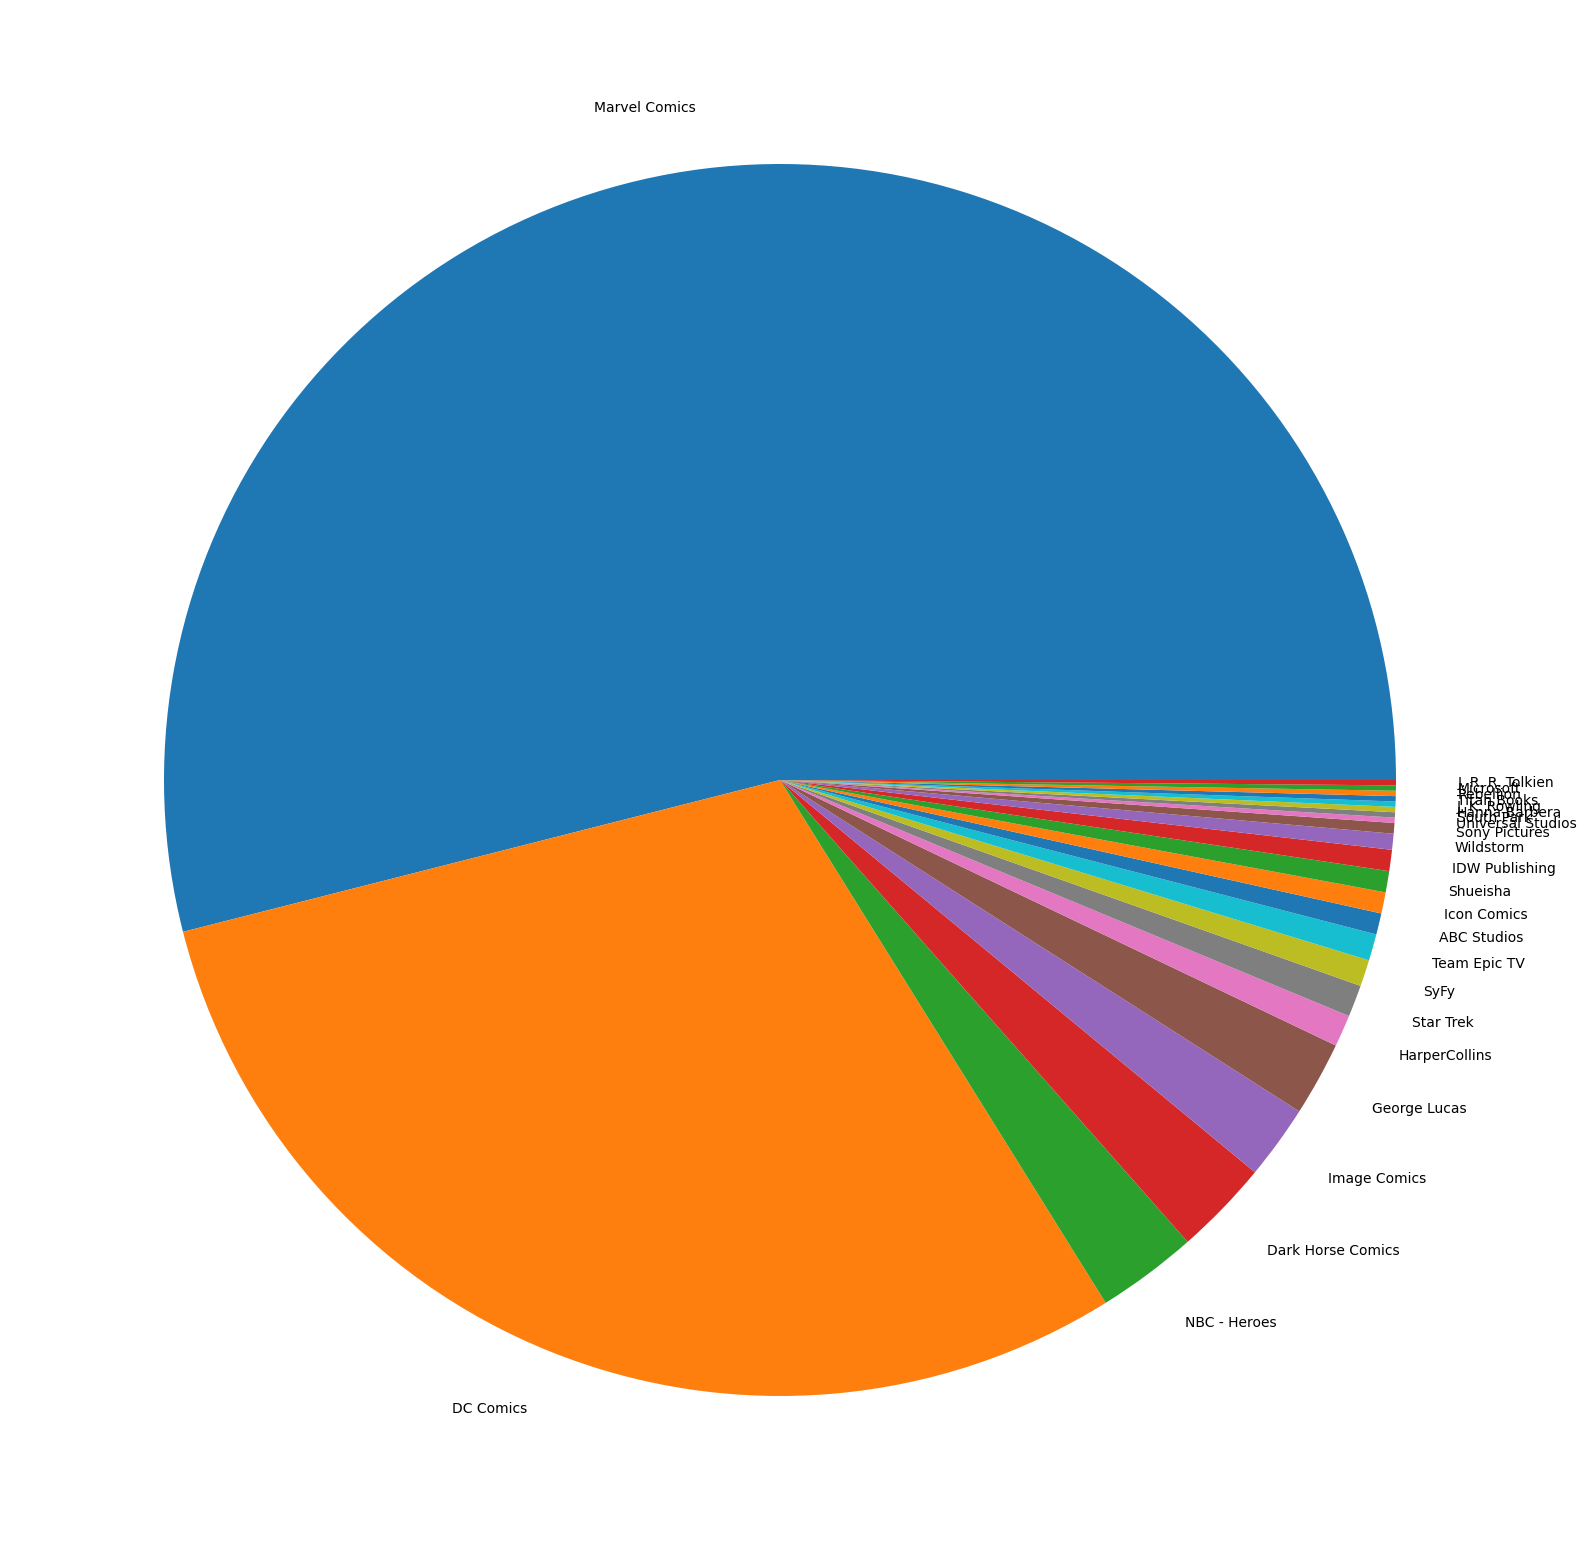

In [15]:
plot.figure(figsize=(20,20))
plot.pie(df["Publisher"].value_counts(), labels=df["Publisher"].value_counts().index);

In [16]:
df["Alignment"].value_counts()

Alignment
good       496
bad        207
neutral     24
-            7
Name: count, dtype: int64

In [17]:
df["Alignment"].value_counts(normalize = True)

Alignment
good       0.675749
bad        0.282016
neutral    0.032698
-          0.009537
Name: proportion, dtype: float64

<Axes: xlabel='Alignment', ylabel='count'>

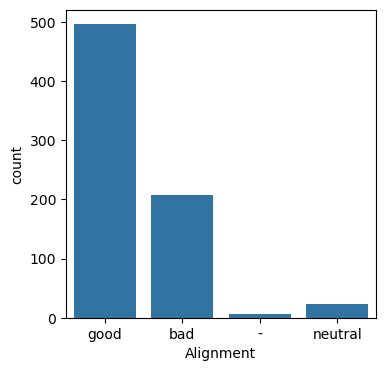

In [18]:
plot.figure(figsize=(4,4))
sns.countplot(data = df, x="Alignment")

In [19]:
df["Race"].value_counts() #смотрим сколько рас всего есть в таблице.

Race
-                    304
Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
                    ... 
Zombie                 1
Human-Spartoi          1
Tamaranean             1
Mutant / Clone         1
Yoda's species         1
Name: count, Length: 62, dtype: int64

In [20]:
df["Race"].unique()

array(['Human', 'Icthyo Sapien', 'Ungaran', 'Human / Radiation',
       'Cosmic Entity', '-', 'Cyborg', 'Xenomorph XX121', 'Android',
       'Vampire', 'Mutant', 'God / Eternal', 'Symbiote', 'Atlantean',
       'Alien', 'Neyaphem', 'New God', 'Alpha', 'Bizarro', 'Inhuman',
       'Metahuman', 'Demon', 'Human / Clone', 'Human-Kree',
       'Dathomirian Zabrak', 'Amazon', 'Human / Cosmic',
       'Human / Altered', 'Kryptonian', 'Kakarantharaian',
       'Zen-Whoberian', 'Strontian', 'Kaiju', 'Saiyan', 'Gorilla',
       'Rodian', 'Flora Colossus', 'Human-Vuldarian', 'Asgardian',
       'Demi-God', 'Eternal', 'Gungan', 'Bolovaxian', 'Animal',
       'Czarnian', 'Martian', 'Spartoi', 'Planet', 'Luphomoid',
       'Parademon', 'Yautja', 'Maiar', 'Clone', 'Talokite', 'Korugaran',
       'Zombie', 'Human-Vulcan', 'Human-Spartoi', 'Tamaranean',
       'Frost Giant', 'Mutant / Clone', "Yoda's species"], dtype=object)

In [21]:
#С помощью цикла меняем наши данные Race из объекта в целочисленные.
unique_races = df['Race'].unique()
race_mapping = {race: idx for idx, race in enumerate(unique_races)}
df['Race_id'] = df['Race'].map(race_mapping)

In [22]:
df.head()

,IDHero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Race_id
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,3
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,4


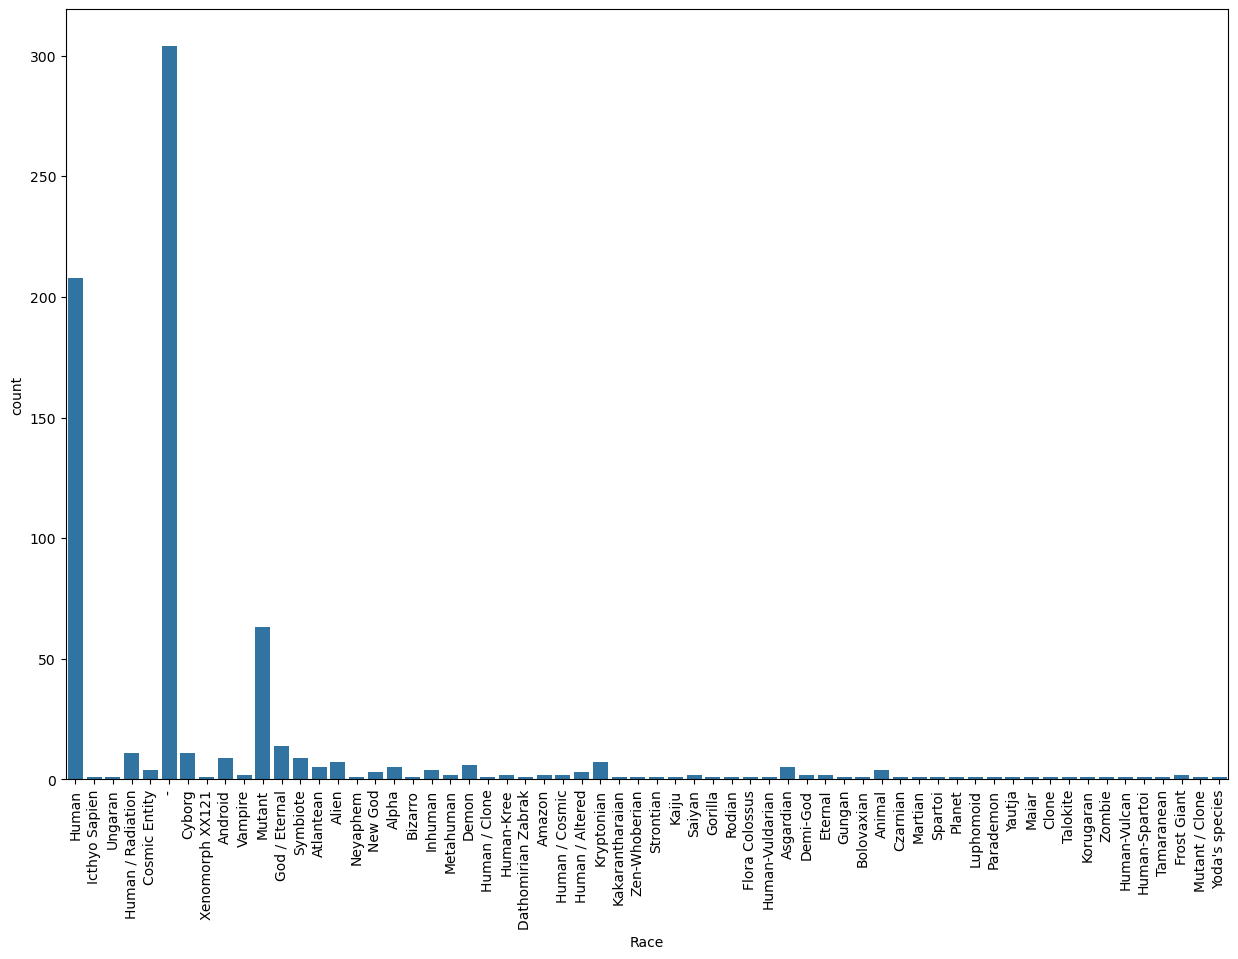

In [23]:
plot.figure(figsize=(15,10))
sns.countplot(data = df, x="Race")
plot.xticks(rotation = 90);

<Axes: xlabel='Gender', ylabel='count'>

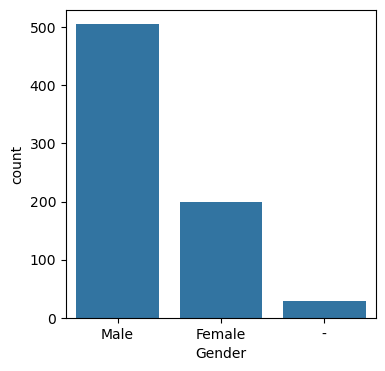

In [24]:
plot.figure(figsize=(4,4))
sns.countplot(data = df, x="Gender")

In [25]:
#С помощью цикла меняем наши данные Eye color из объекта в целочисленные.
unique_eyes = df['Eye color'].unique()
eyes_mapping = {eye: idx for idx, eye in enumerate(unique_eyes)}
df['Eye_id'] = df['Eye color'].map(eyes_mapping)

In [26]:
df.head()

,IDHero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Race_id,Eye_id
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0,0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,1
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2,1
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,3,2
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,4,1


In [29]:
unique_hairs = df['Hair color'].unique()
hairs_mapping = {hair: idx for idx, hair in enumerate(unique_hairs)}
df['Hairs_id'] = df['Hair color'].map(hairs_mapping)

In [30]:

df.head()

,IDHero,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Race_id,Eye_id,Hairs_id
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,0,0,0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,1,1,0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,2,1,0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,3,2,0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,0.0,4,1,1


In [31]:
df_corr = df[['IDHero', 'Height', 'Weight', 'Race_id', 'Eye_id', 'Hairs_id']].corr()
df_corr

,IDHero,Height,Weight,Race_id,Eye_id,Hairs_id
IDHero,1.000000,0.036323,0.051846,0.149239,0.099267,0.007381
Height,0.036323,1.000000,0.489591,0.109329,-0.056505,0.019733
Weight,0.051846,0.489591,1.000000,0.095698,-0.045366,0.024884
Race_id,0.149239,0.109329,0.095698,1.000000,0.049299,-0.043695
Eye_id,0.099267,-0.056505,-0.045366,0.049299,1.000000,-0.053324
Hairs_id,0.007381,0.019733,0.024884,-0.043695,-0.053324,1.000000


<Axes: >

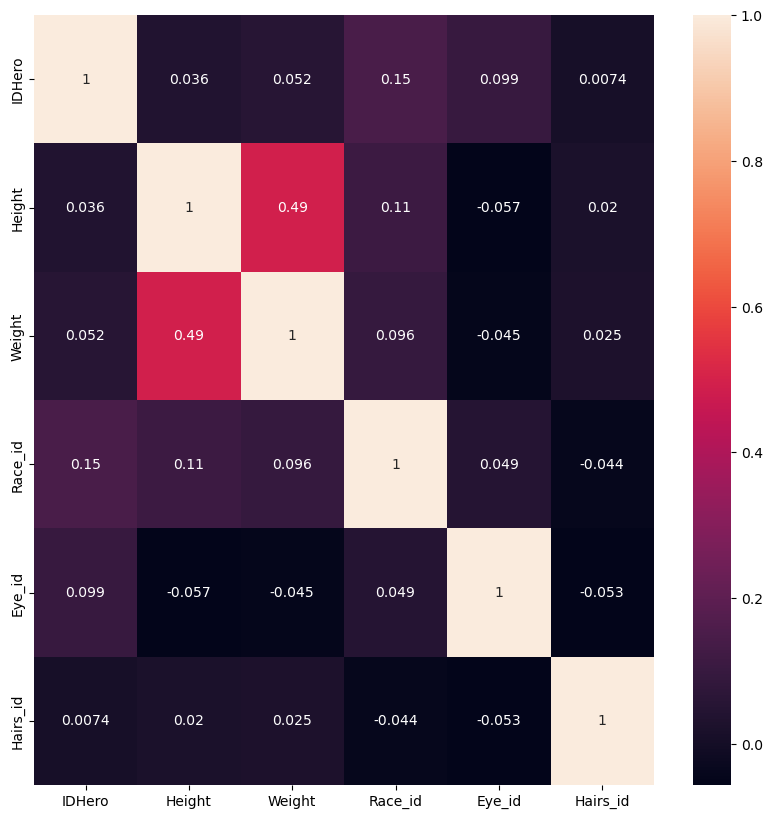

In [32]:
plot.figure(figsize=(10,10))
sns.heatmap(df_corr, annot= True)

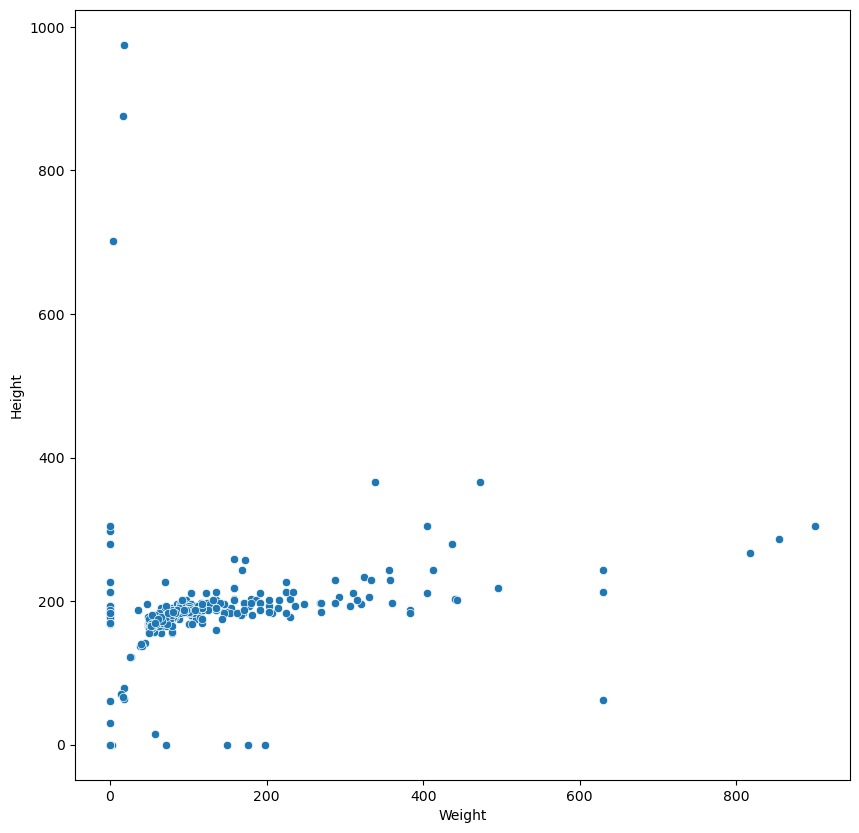

In [33]:
plot.figure(figsize = (10,10))
sns.scatterplot(data=df, x="Weight", y = "Height");

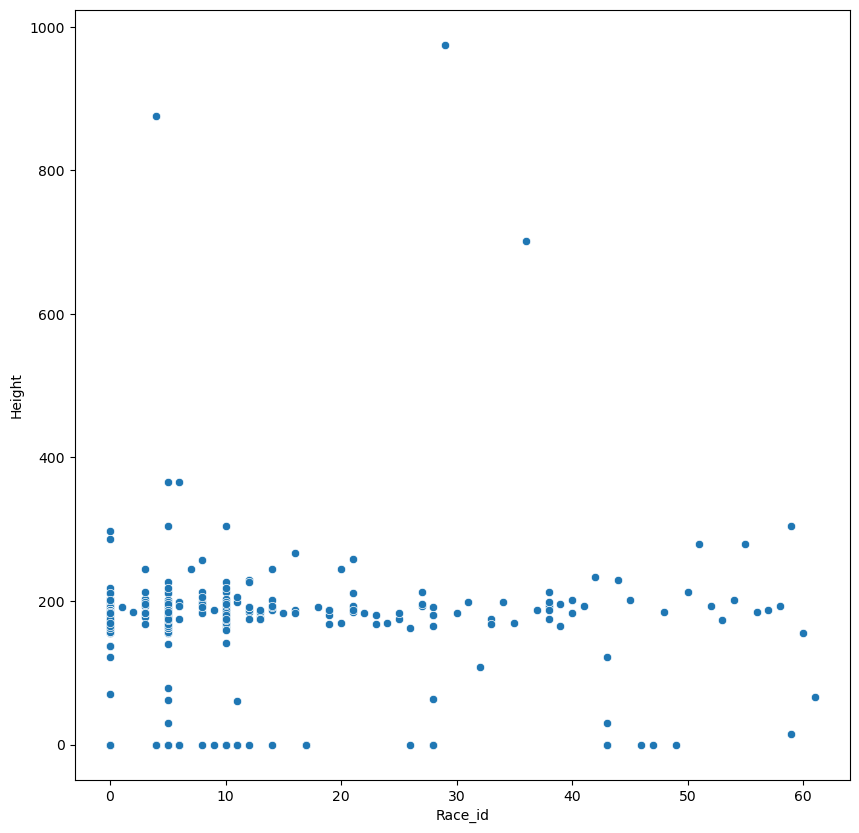

In [34]:
plot.figure(figsize = (10,10))
sns.scatterplot(data=df, x="Race_id", y='Height');

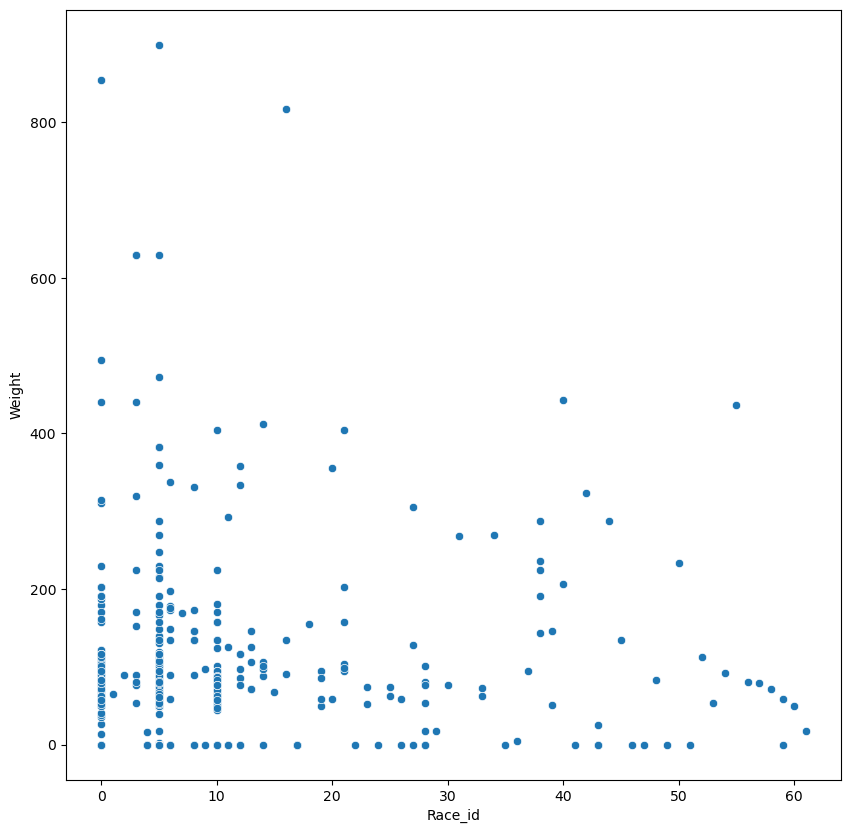

In [35]:
plot.figure(figsize = (10,10))
sns.scatterplot(data=df, x="Race_id", y='Weight');

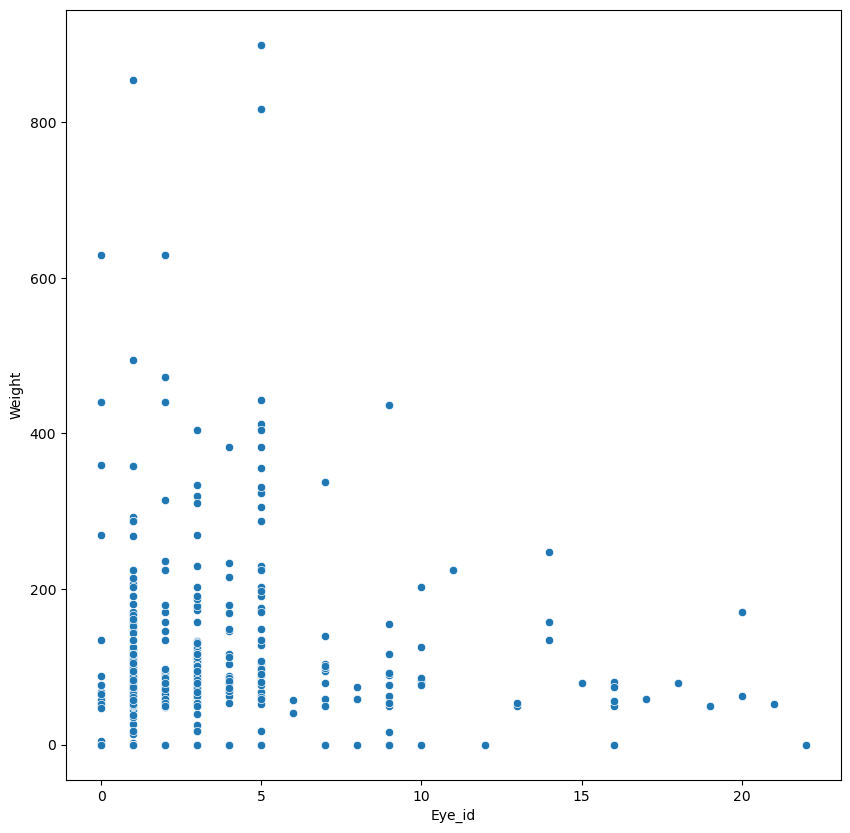

In [36]:
plot.figure(figsize = (10,10))
sns.scatterplot(data=df, x="Eye_id", y='Weight');

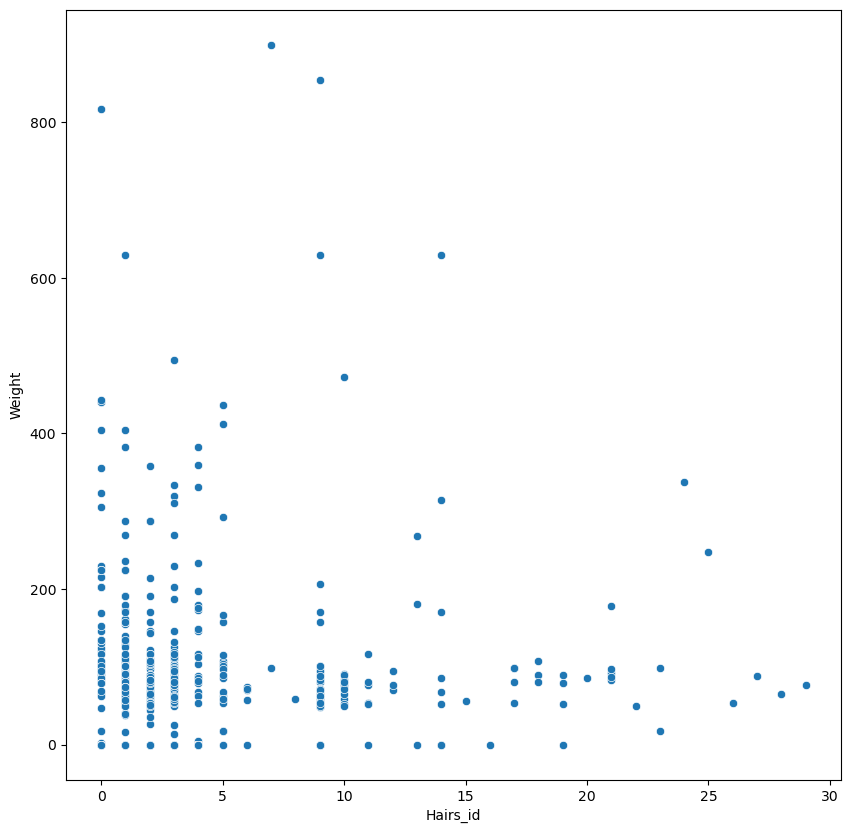

In [38]:
plot.figure(figsize = (10,10))
sns.scatterplot(data=df, x="Hairs_id", y='Weight');

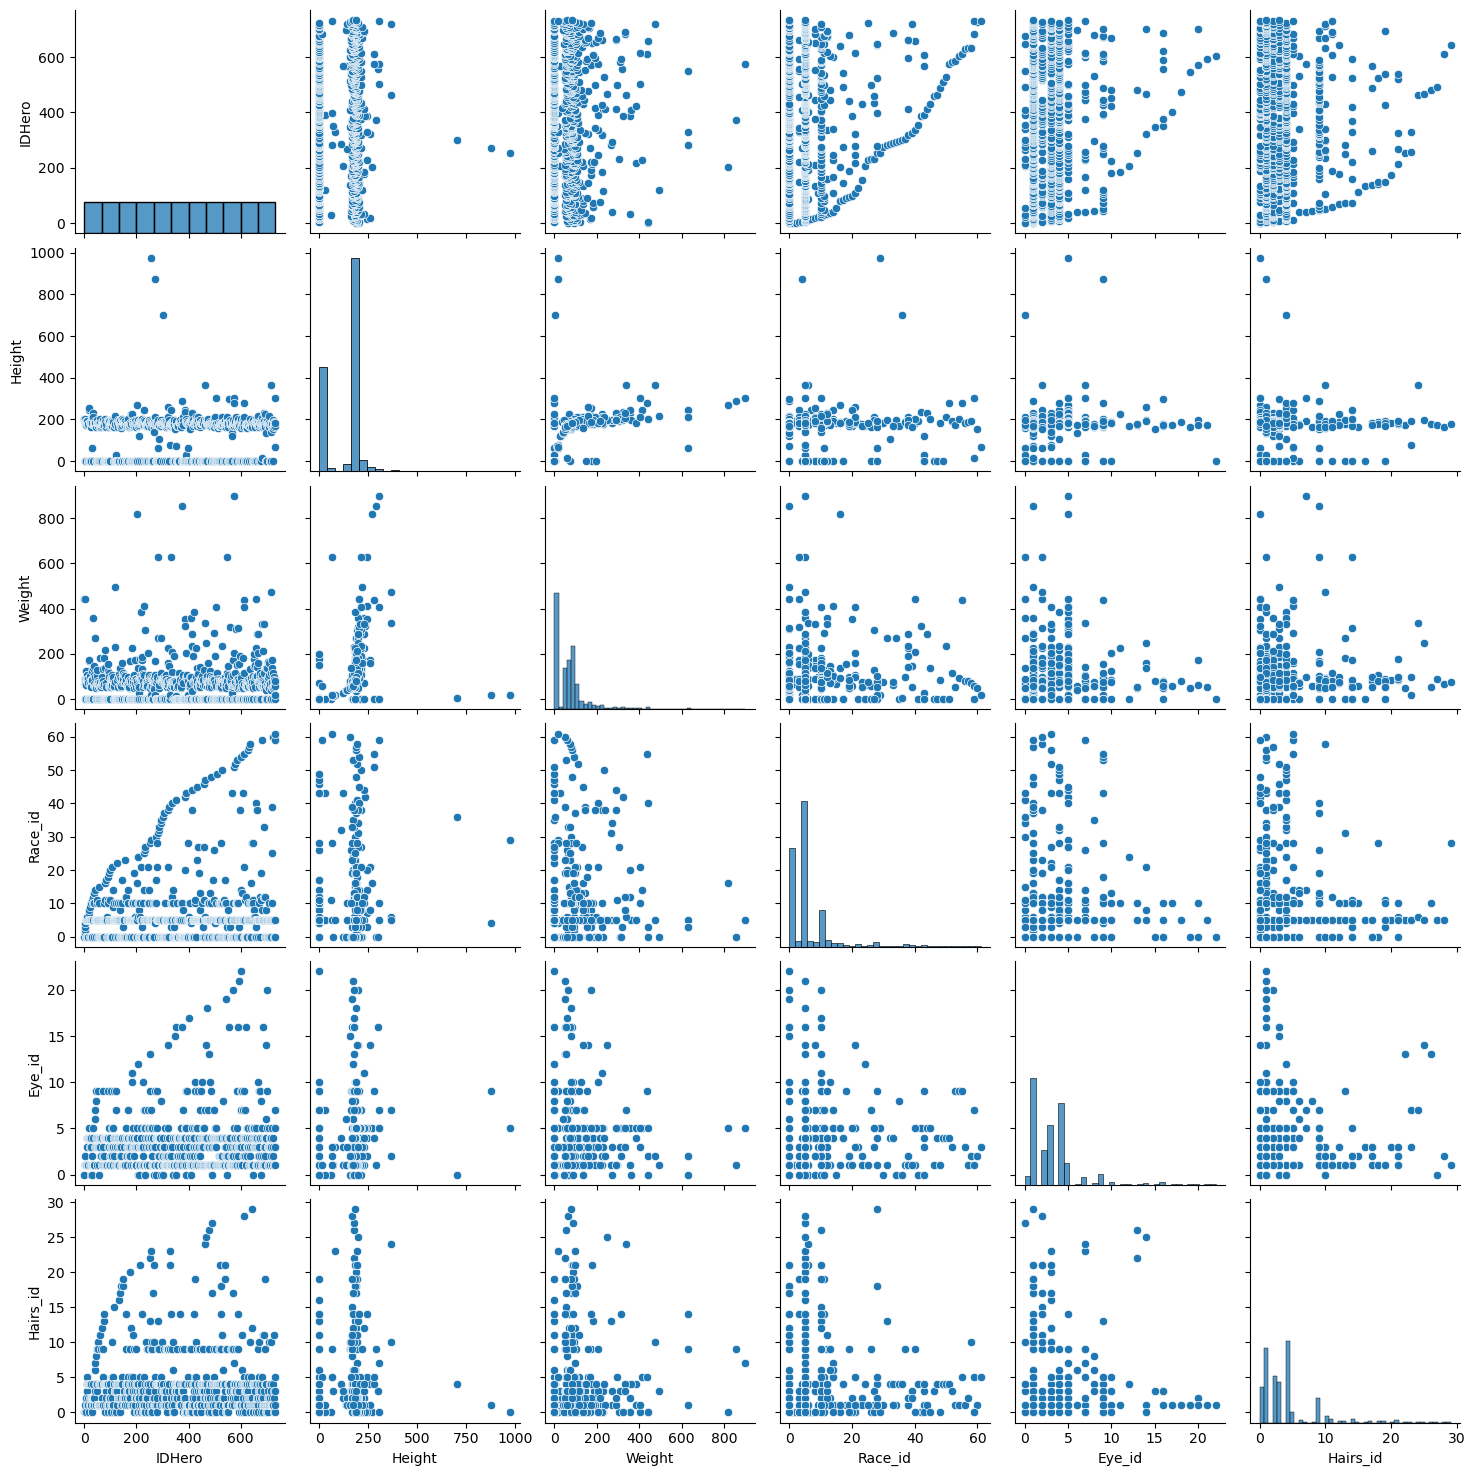

In [44]:
sns.pairplot(data=df);